In [66]:
import numpy as np

n = 3


# A = np.array([
#     [0, 1, 0, 0],
#     [1, 0, 0, 0],
#     [0, 0, 1, 0],
#     [0, 0, 0, 1]
# ])
# a = np.array([1, 2, 3, 1])
# b = np.array([0, 2, 1, 1])
# c = np.array([1, 1, 1, 1])

# A = np.array([
#     list(a),
#     list(b),
#     list(c),
#     list(a - b - c)
# ])

# A = np.random.rand(n, n)

# norm1 = max(np.linalg.eig(A.T @ A).eigenvalues)
# B = np.linalg.inv(A)
# norm2 = max(np.linalg.eig(B.T @ B).eigenvalues)
# mu = norm1 * norm2

A = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i<=j: 
            A[i, j] = (i+1)
            A[j, i] = (i+1)

norm1 = max(np.linalg.eig(A.T @ A).eigenvalues)
B = np.linalg.inv(A)
norm2 = max(np.linalg.eig(B.T @ B).eigenvalues)
mu = norm1 * norm2

eigval = np.linalg.eig(A).eigenvalues

A, mu

(array([[1., 1., 1.],
        [1., 2., 2.],
        [1., 2., 3.]]),
 268.754436503487)

In [67]:
a = A[0, 0]
R = A[0, :][1:]
S = A[:, 0][1:].reshape((n-1,1))
M = A[1:, 1:]
a, R, S, M

(1.0,
 array([1., 1.]),
 array([[1.],
        [1.]]),
 array([[2., 2.],
        [2., 3.]]))

In [68]:
# Samuelson = np.zeros((n, 2*n))

LeftPart = [list(R)]
for i in range(1, n):
    LeftPart.append(list(LeftPart[i - 1] @ M))

LeftPart = np.array(LeftPart)
A, " ", LeftPart

(array([[1., 1., 1.],
        [1., 2., 2.],
        [1., 2., 3.]]),
 ' ',
 array([[ 1.,  1.],
        [ 4.,  5.],
        [18., 23.]]))

In [69]:
RightPart = np.zeros((n, n+1))

buf = [(LeftPart[_] @ S)[0] for _ in range(n)]

for j in range(n):
    RightPart[j, n-j] = -a
    RightPart[j, n-j-1] = 1

    for i in range(j):
        RightPart[j, n-j+i+1] = -buf[i]

RightPart

array([[ 0.,  0.,  1., -1.],
       [ 0.,  1., -1., -2.],
       [ 1., -1., -2., -9.]])

In [70]:
Samuelson = np.hstack((LeftPart, RightPart))
list(Samuelson)

[array([ 1.,  1.,  0.,  0.,  1., -1.]),
 array([ 4.,  5.,  0.,  1., -1., -2.]),
 array([18., 23.,  1., -1., -2., -9.])]

In [71]:
for k in range(n-1):
    for l in range(k+1, n):
        Samuelson[l] -= Samuelson[k] / Samuelson[k, k] * Samuelson[l, k]
        print(Samuelson.round(4), "\n")

#Samuelson, Samuelson[n-1][-1-n:]

# koeffs = list(Samuelson[n-1][-1-n:])

# roots = np.roots(koeffs)
# roots

# eigval, sorted(roots, reverse=True)

[[ 1.  1.  0.  0.  1. -1.]
 [ 0.  1.  0.  1. -5.  2.]
 [18. 23.  1. -1. -2. -9.]] 

[[  1.   1.   0.   0.   1.  -1.]
 [  0.   1.   0.   1.  -5.   2.]
 [  0.   5.   1.  -1. -20.   9.]] 

[[ 1.  1.  0.  0.  1. -1.]
 [ 0.  1.  0.  1. -5.  2.]
 [ 0.  0.  1. -6.  5. -1.]] 



In [72]:
import numpy as np


def SamuelsonMethod(A):
    K = 0

    n = len(A)

    a = A[0, 0]
    R = A[0, :][1:]
    S = A[:, 0][1:].reshape((n-1,1))
    M = A[1:, 1:]


    LeftPart = [list(R)]
    for i in range(1, n):
        LeftPart.append(list(LeftPart[i - 1] @ M)) # (n-1) - умножение, (n-2) - сложение -> (2n - 3)(n-1)^2
        K += ((n-1) + (n-2))*(n-1)

    LeftPart = np.array(LeftPart)


    RightPart = np.zeros((n, n+1))

    buf = [(LeftPart[_] @ S)[0] for _ in range(n-1)] # (2n - 3)(n-1)
    K += (2*n - 3)*(n-1)

    for j in range(n):
        RightPart[j, n-j] = -a
        RightPart[j, n-j-1] = 1

        for i in range(j):
            RightPart[j, n-j+i+1] = -buf[i]


    Samuelson = np.hstack((LeftPart, RightPart))

    for k in range(n-1):
        for l in range(k+1, n): # (n-1)n/2
            Samuelson[l] -= Samuelson[k] / Samuelson[k, k] * Samuelson[l, k] # 3*2n  ->  3(n - 1)n^2
            #print(Samuelson, "\n")

            K += 3 * 2*n
    print(K)

N = 10
A = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i<=j: 
            A[i, j] = (i+1)
            A[j, i] = (i+1)

SamuelsonMethod(A)

print((2*N - 3)*(N-1)**2 + (2*N - 3)*(N-1) + 3*(N - 1)*N**2)

4230
4230


In [73]:
import numpy as np
import time
from matplotlib import pyplot as plt


def SamuelsonMethod(A):
    n = len(A)

    a = A[0, 0]
    R = A[0, :][1:]
    S = A[:, 0][1:].reshape((n-1,1))
    M = A[1:, 1:]


    LeftPart = [list(R)]
    for i in range(1, n):
        LeftPart.append(list(LeftPart[i - 1] @ M))

    LeftPart = np.array(LeftPart)


    RightPart = np.zeros((n, n+1))

    buf = [(LeftPart[_] @ S)[0] for _ in range(n-1)]

    for j in range(n):
        RightPart[j, n-j] = -a
        RightPart[j, n-j-1] = 1

        for i in range(j):
            RightPart[j, n-j+i+1] = -buf[i]


    Samuelson = np.hstack((LeftPart, RightPart))

    for k in range(n-1):
        for l in range(k+1, n):
            Samuelson[l] -= Samuelson[k] / Samuelson[k, k] * Samuelson[l, k]



timearr = []
Narr = list(range(100, 5000, 100))
for N in Narr:

    A = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            if i<=j: 
                A[i, j] = (i+1)
                A[j, i] = (i+1)

    start_time = time.time()
    SamuelsonMethod(A)
    end_time = time.time()

    timearr.append(end_time - start_time)

plt.plot(Narr, timearr)
timearr

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14652\3927103402.py:17: RuntimeWarning: overflow encountered in matmul
  LeftPart.append(list(LeftPart[i - 1] @ M))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14652\3927103402.py:24: RuntimeWarning: overflow encountered in matmul
  buf = [(LeftPart[_] @ S)[0] for _ in range(n-1)]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14652\3927103402.py:38: RuntimeWarning: invalid value encountered in multiply
  Samuelson[l] -= Samuelson[k] / Samuelson[k, k] * Samuelson[l, k]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14652\3927103402.py:38: RuntimeWarning: invalid value encountered in subtract
  Samuelson[l] -= Samuelson[k] / Samuelson[k, k] * Samuelson[l, k]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14652\3927103402.py:38: RuntimeWarning: overflow encountered in multiply
  Samuelson[l] -= Samuelson[k] / Samuelson[k, k] * Samuelson[l, k]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14652\3927103402.py:38: RuntimeWarning: invalid value encounte

KeyboardInterrupt: 

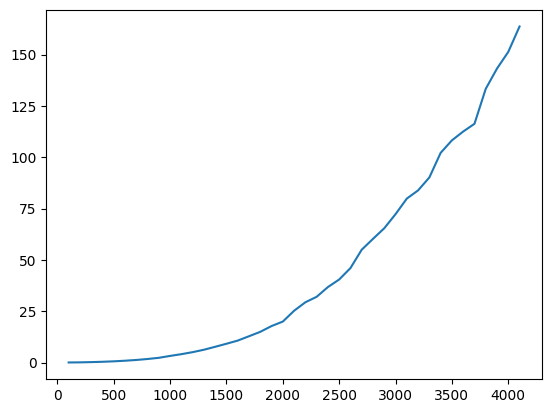

In [80]:
plt.plot(Narr[:-8], timearr)

In [81]:
[0.0372006893157959,
 0.09583449363708496,
 0.2157304286956787,
 0.3745734691619873,
 0.5988996028900146,
 0.8942573070526123,
 1.260406255722046,
 1.733635425567627,
 2.3114144802093506,
 3.2342941761016846,
 4.084203481674194,
 5.068538427352905,
 6.243319034576416,
 7.68452262878418,
 9.163716793060303,
 10.703766822814941,
 12.823225975036621,
 14.972129583358765,
 17.784646034240723,
 19.96726131439209,
 25.23374891281128,
 29.3627769947052,
 32.03582429885864,
 36.781312227249146,
 40.46602702140808,
 46.03926634788513,
 54.991140365600586,
 60.267618894577026,
 65.43579173088074,
 72.30891180038452,
 79.88008260726929,
 83.88248991966248,
 90.18634295463562,
 102.16199779510498,
 108.25139617919922,
 112.5507345199585,
 116.31181788444519,
 133.3509123325348,
 143.23196387290955,
 151.36217308044434,
 163.73154711723328]

[0.0372006893157959,
 0.09583449363708496,
 0.2157304286956787,
 0.3745734691619873,
 0.5988996028900146,
 0.8942573070526123,
 1.260406255722046,
 1.733635425567627,
 2.3114144802093506,
 3.2342941761016846,
 4.084203481674194,
 5.068538427352905,
 6.243319034576416,
 7.68452262878418,
 9.163716793060303,
 10.703766822814941,
 12.823225975036621,
 14.972129583358765,
 17.784646034240723,
 19.96726131439209,
 25.23374891281128,
 29.3627769947052,
 32.03582429885864,
 36.781312227249146,
 40.46602702140808,
 46.03926634788513,
 54.991140365600586,
 60.267618894577026,
 65.43579173088074,
 72.30891180038452,
 79.88008260726929,
 83.88248991966248,
 90.18634295463562,
 102.16199779510498,
 108.25139617919922,
 112.5507345199585,
 116.31181788444519,
 133.3509123325348,
 143.23196387290955,
 151.36217308044434,
 163.73154711723328]